Mid Program Project II

1.Read the parser.txt file containing the image id and the respective word for that image and take the first 10000 instances 
for training and testing of the model                                                                               Marks: 10

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import string

import cv2
import os

import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Conv2D,Flatten,MaxPool2D,Activation,MaxPooling2D
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
df = pd.read_csv("parser.txt", sep=" ", encoding="latin1", on_bad_lines='skip')
df.head()

,a01-000u-00-00,ok,154,408,768,27,51,AT,A
0,a01-000u-00-01,ok,154,507,766,213,48,NN,MOVE
1,a01-000u-00-02,ok,154,796,764,70,50,TO,to
2,a01-000u-00-03,ok,154,919,757,166,78,VB,stop
3,a01-000u-00-04,ok,154,1185,754,126,61,NPT,Mr.
4,a01-000u-00-05,ok,154,1438,746,382,73,NP,Gaitskell


In [3]:
df.head(10000)

,a01-000u-00-00,ok,154,408,768,27,51,AT,A
0,a01-000u-00-01,ok,154,507,766,213,48,NN,MOVE
1,a01-000u-00-02,ok,154,796,764,70,50,TO,to
2,a01-000u-00-03,ok,154,919,757,166,78,VB,stop
3,a01-000u-00-04,ok,154,1185,754,126,61,NPT,Mr.
4,a01-000u-00-05,ok,154,1438,746,382,73,NP,Gaitskell
...,...,...,...,...,...,...,...,...,...
9995,b01-049-02-00,ok,198,327,1112,109,65,ATI,the
9996,b01-049-02-01,ok,198,465,1115,222,87,NN,strength
9997,b01-049-02-02,ok,198,731,1113,72,69,INO,of
9998,b01-049-02-03,ok,198,841,1120,286,79,NP$,Germany's


In [9]:
characters=string.ascii_letters + string.digits + string.punctuation
def 
(txt):
    output=[]
    for index,character in enumerate(txt):
        output.append(characters.index(character))
    return output
print(characters,len(characters))

abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~ 94


In [ ]:
2. Images can be of different shape thus resize all your images to have the same shape (for 
example = (128,32))

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75571 entries, 0 to 75570
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   a01-000u-00-00  75571 non-null  object
 1   ok              75571 non-null  object
 2   154             75571 non-null  int64 
 3   408             75571 non-null  int64 
 4   768             75571 non-null  int64 
 5   27              75571 non-null  int64 
 6   51              75571 non-null  int64 
 7   AT              75571 non-null  object
 8   A               75571 non-null  object
dtypes: int64(5), object(4)
memory usage: 5.2+ MB


In [11]:
df.shape

(75571, 9)

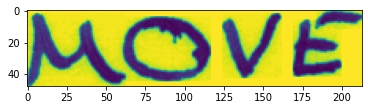

In [21]:
img = mpimg.imread('C:/Users/USER/Desktop/EDUREKA - NITW AIML/9.Mid Project II/words/a01/a01-000u/a01-000u-00-01.png')
imgplot = plt.imshow(img)
plt.show()

In [22]:
img.shape

(48, 213)

In [23]:
img.size

10224

In [25]:
def read_file(filename):
    file=open(filename,'r')
    text=file.read()
    file.close()
    return text

In [26]:
data=read_file('parser.txt')
data=data.split('\n')
data[:10]

['a01-000u-00-00 ok 154 408 768 27 51 AT A',
 'a01-000u-00-01 ok 154 507 766 213 48 NN MOVE',
 'a01-000u-00-02 ok 154 796 764 70 50 TO to',
 'a01-000u-00-03 ok 154 919 757 166 78 VB stop',
 'a01-000u-00-04 ok 154 1185 754 126 61 NPT Mr.',
 'a01-000u-00-05 ok 154 1438 746 382 73 NP Gaitskell',
 'a01-000u-00-06 ok 154 1896 757 173 72 IN from',
 'a01-000u-01-00 ok 156 395 932 441 100 VBG nominating',
 'a01-000u-01-01 ok 156 901 958 147 79 DTI any',
 'a01-000u-01-02 ok 156 1112 958 208 42 AP more']

In [4]:
def transform(image):
    width ,height =image.shape
    
    new_width =32
    new_height =int(height*(new_width/ width))
    image = cv2.resize(image,(new_height,new_width))
    image=image.astype('float32')
    width,height= image.shape
    
    if width < 32 :
        add_zeros =np.full((32-width,height),255)
        image =np.concatenate((image,add_zeros))
        width,height=image.shape
        
    if height < 128:
        add_zeros =np.full((width,128-height),255)
        image =np.concatenate((image,add_zeros),axis=1)
        width,height=image.shape
        
        
    if height >128 or width >32:
        dim =(128,32)
        image =cv2.resize(image,dim)
        
    image = cv2.subtract(255,image)
    #Expanding the dimension of image
    image = np.expand_dims(image,axis=2)
    
    #Normalize the image
    image = image/255
    return image
    


In [5]:
img_width, img_height = 128,32  #width and height of the images
#train_data_dir = r"/content/training_set/training_set"
train_data_dir = "C:/Users/USER/Desktop/EDUREKA - NITW AIML/9.Mid Project II/words"
#validation_data_dir=r"/content/test_set/test_set"
#validation_data_dir="C:/Users/USER/Desktop/EDUREKA - NITW AIML/6. Deep Learning/3. Image Classification using CNN/2.Cat and Dog/test_set/test_set"
nb_train_sample =100
nb_validation_samples =100
epochs =100
batch_size= 20

In [6]:
import tensorflow.keras.backend as k
if k.image_data_format()=='channels_first': 
    input_shape=(3, img_width, img_height)
else:
    input_shape=(img_width,img_height,3)

In [ ]:
3. Currently, the pixel values are between 0 to 255, normalize the images so that the pixel 
values are in range 0 to 1

In [7]:
train_datagen=ImageDataGenerator ( rescale=1. /255,shear_range =0.2,zoom_range=0.2,horizontal_flip =True)


test_datagen=ImageDataGenerator (rescale=1. /255)


train_generator =train_datagen.flow_from_directory(train_data_dir,target_size =(img_width,img_height), batch_size=batch_size,class_mode='binary')
#Now this, will generate training generator data
#Target_size = mentioned image_width and image_height
#Batch_size = 20 (already mentioned)
#Class_mode = binary(because here only two classes are there to classify)


#validation_generator =test_datagen.flow_from_directory(validation_data_dir,target_size =(img_width,img_height), batch_size=batch_size,class_mode='binary')
#Now, this will generate testing generator data
#Target_size = mentioned image_width and image_height
#Batch_size = 20 (already mentioned)
#Class_mode = binary(because here only two classes are there to classify)

Found 115320 images belonging to 76 classes.


In [ ]:
4. Create a list of all characters and use the character’s index to encode the actual words 
into digits

In [9]:
df.head()

,a01-000u-00-00,ok,154,408,768,27,51,AT,A
0,a01-000u-00-01,ok,154,507,766,213,48,NN,MOVE
1,a01-000u-00-02,ok,154,796,764,70,50,TO,to
2,a01-000u-00-03,ok,154,919,757,166,78,VB,stop
3,a01-000u-00-04,ok,154,1185,754,126,61,NPT,Mr.
4,a01-000u-00-05,ok,154,1438,746,382,73,NP,Gaitskell


In [22]:
train_images=[]
train_labels=[]
train_input_length=[]
train_label_length=[]
train_original_text=[]

valid_images=[]
valid_labels=[]
valid_input_length=[]
valid_label_length=[]
valid_original_text=[]

max_len=0
for index, line in enumerate(df):
    print(line)
    print(index)
    splits=line.split(' ')
    status=splits[1]
    print("OK",status)
    if status == 'ok':
        word_id=splits[0]
        word="".join(splits[8:])
        splits_id=word_id.split('-')
        filepath='words/{}/{}-{}/{}.png'.format(splits_id[0],splits_id[0],splits_id[1],word_id)
        
        #processing on  image
        img = cv2.imread(filepath,cv2.IMREAD_GRAYSCALE)
        try:
            img=transform(img)
        except:
            continue
        #processing on label
        try:
            label = encoder(word)
        except:
            continue
        if index % 10 == 0:
            valid_images.append(img)
            valid_labels.append(label)
            valid_input_length.append(31)
            valid_label_length.append(len(word))
            valid_original_text.append(word)
        else:
            train_images.append(img)
            train_labels.append(label)
            train_input_length.append(31)
            train_label_length.append(len(word))
            train_original_text.append(word)
            
        if len(word) >max_len:
            max_len=len(word)
    if index >= 10000:
        break

a01-000u-00-00
0
OK a01-000u-00-00
ok
1
OK ok


IndexError: list index out of range

In [ ]:
5. Pad all the words to have a similar length

In [50]:
train_padded_label=pad_sequences(train_labels,
                                maxlen=max_len,
                                padding='post',
                                value=len(characters))

valid_padded_label=pad_sequences(valid_labels,
                                maxlen=max_len,
                                padding='post',
                                value=len(characters))



In [51]:
train_padded_label.shape, valid_padded_label.shape

((0, 0), (0, 0))

In [ ]:
6. Split your dataset for training and testing

In [ ]:
7. Create a model for training:
a) Add several CNN layers to extract the sequence of features
b) Add Bi-LSTM layers to propagate through the sequence
c) Add a dense layer (output layer) with total number of neurons as (total number of 
characters + 1) and the activation as softmax.

In [ ]:
8. The output sequence from the output layer will be fed to the CTC layer.

In [ ]:
9. Predict output using your model (don’t use the last loss layer) on validation images, use 
ctc_decode to decode your output and then print the actual words using the indexes 
from your character’s list.